# 机器学习工程师纳米学位
## 强化学习
## 项目 4: 训练智能出租车学会驾驶

欢迎来到机器学习工程师纳米学位的第四个项目！在这个notebook文件中，模板代码已经提供给你，有助于你对*智能出租车*的分析和实现学习算法。你无须改动已包含的代码，除非另有要求。 你需要回答notebook文件中给出的与项目或可视化相关的问题。每一个你要回答的问题前都会冠以**'问题 X'**。仔细阅读每个问题，并在后面**'回答'**文本框内给出完整的回答。你提交的项目会根据你对于每个问题的回答以及提交的`agent.py`的实现来进行评分。 

>**提示：** Code 和 Markdown 单元格可通过 **Shift + Enter** 快捷键来执行。此外，Markdown可以通过双击进入编辑模式。

-----

## 开始
在这个项目中，你将构建一个优化的Q-Learning驾驶代理程序，它会操纵*智能出租车* 通过它的周边环境到达目的地。因为人们期望*智能出租车*要将乘客从一个地方载到另一个地方，驾驶代理程序会以两个非常重要的指标来评价：**安全性**和**可靠性**。驾驶代理程序在红灯亮时仍然让*智能出租车*行驶往目的地或者勉强避开事故会被认为是**不安全**的。类似的，驾驶代理程序频繁地不能适时地到达目的地会被认为**不可靠**。最大化驾驶代理程序的**安全性**和**可靠性**保证了*智能出租车*会在交通行业获得长期的地位。

**安全性**和**可靠性**用字母等级来评估，如下：

| 等级 	| 安全性 	| 可靠性 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	| 代理程序没有任何妨害交通的行为，<br/>并且总是能选择正确的行动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的100%。 |
|   A   	| 代理程序有很少的轻微妨害交通的行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的90%。 |
|   B   	| 代理程序频繁地有轻微妨害交通行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的80%。 |
|   C   	| 代理程序有至少一次重大的妨害交通行为，<br/>如闯红灯。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的70%。 |
|   D   	| 代理程序造成了至少一次轻微事故，<br/>如绿灯时在对面有车辆情况下左转。	| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的60%。 |
|   F   	| 代理程序造成了至少一次重大事故，<br/>如有交叉车流时闯红灯。	| 代理程序在合理时间内到达目的地的次数<br />未能达到行驶次数的60%。 |

为了协助评估这些重要的指标，你会需要加载可视化模块的代码，会在之后的项目中用到。运行下面的代码格来导入这个代码，你的分析中会需要它。

In [4]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

In [3]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### 了解世界
在开始实现你的驾驶代理程序前，首先需要了解*智能出租车*和驾驶代理程序运行的这个世界（环境）。构建自我学习的代理程序重要的组成部分之一就是了解代理程序的特征，包括代理程序如何运作。原样直接运行`agent.py`代理程序的代码，不需要做任何额外的修改。让结果模拟运行一段时间，以观察各个不同的工作模块。注意在可视化模拟程序（如果启用了），**白色车辆**就是*智能出租车*。

In [11]:
%run smartcab/agent.py


/-------------------------
| Training trial 1
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 1.48)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2.23)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 0.58)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.99)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------


!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.57)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.25)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with oncoming traffic. (rewarded 0.31)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded -0.12)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded -0.04)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\---------------

!! Agent state not been updated!
Agent followed the waypoint forward. (rewarded 1.98)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of forward. (rewarded 0.92)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2.57)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded 1.68)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded 1.17)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

!! Agent state not been updated!
Agent attemp

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.79)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.01)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.14)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.46)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of right. (rewarded 1.66)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-----------


/-------------------
| Step 28 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.20)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.69)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 8
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2.22)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 1.87)
90% of time remaining to reach destination.

/-------------------
| Step 2 

!! Agent state not been updated!
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.07)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.81)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -9.86)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of right. (rewarded 0.36)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of right. (rewarded 1.26)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\--------


/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 0.69)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with oncoming traffic. (rewarded 1.16)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint left. (rewarded 2.09)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -5.89)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 12
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| St


/-------------------
| Step 14 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2.54)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2.37)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of forward. (rewarded 0.04)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of right. (rewarded 1.39)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.02)
24% of time remaining to reach destination.

/-------------------



/-------------------
| Step 8 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.10)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -9.40)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with oncoming traffic. (rewarded 1.14)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of forward. (rewarded -0.10)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light with traffic and c

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.91)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.15)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 1.07)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint forward. (rewarded 2.61)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of forward. (rewarded 0.35)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

!! Agent state not been upda

!! Agent state not been updated!
Agent drove left instead of right. (rewarded 0.96)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 1.21)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 1.71)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.13)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 1.32)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2.80)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 1.66)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.77)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.24)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.83)
48% of time remaining to reach destination.

/-------------------
| Ste


/-------------------
| Step 7 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.52)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.94)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of forward. (rewarded 1.30)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of right. (rewarded 1.17)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2.34)
40% of time remaining to reach de


/-------------------
| Step 10 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.70)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.24)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 0.93)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.04)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (reward


/-------------------
| Step 13 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 0.94)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint left. (rewarded 0.85)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2.48)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.49)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint forward. (rewarded 2.24)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.63)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 1.05)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.43)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 1.29)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 0.44)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

!! Agent state not been upd

!! Agent state not been updated!
Agent followed the waypoint left. (rewarded 2.40)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint forward. (rewarded 2.33)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 0.68)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.75)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -9.36)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

!! Agent state not been updat


/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.50)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.62)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with oncoming traffic. (rewarded 0.44)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded 0.70)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint left. (rewarded 1.36)
70% of time remaining to reach destination.



/-------------------
| Step 6 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.27)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 1.16)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.16)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -9.86)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

!! Agent state not been updated!
Agent idled at a 


Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Testing trial 16
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -9.68)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.88)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.44)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.15)
80% of time remaining to reach destinati

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 0.61)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint left. (rewarded 1.52)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.75)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -9.45)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of forward. (rewarded 0.22)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

!! Agent state n


/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded -0.58)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded -0.42)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of right. (rewarded 0.53)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Testing trial 20
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 2.57)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------



<Figure size 432x288 with 0 Axes>

### 问题 1
用几句话，描述在运行默认的`agent.py`代理程序中，你在模拟程序里观察到了什么。一些你可以考虑的情况：
- *在模拟过程中，智能出租车究竟移动了吗？*
- *驾驶代理程序获得了什么样的奖励？*
- *交通灯的颜色改变是如何影响奖励的？*

**提示：** 从顶层的`/smartcab/`目录（这个notebook所在的地方），运行命令
```bash
'python smartcab/agent.py'
```

回答：

在模拟过程中，智能出租车没有移动，但是路线图有改变，每次试验，智能出租车会换一个位置；
驾驶程序，当红灯时没有移动，给正分数，当绿灯时不移动，给负分数,但是绿灯时，前面有车过来，智能出租车不移动，给正分数。


### 理解代码
除了要了解世界之外，还需要理解掌管世界、模拟程序等等如何运作的代码本身。如果一点也不去探索一下*“隐藏”*的器件，就试着去创建一个驾驶代理程序会很难。在顶层的`/smartcab/`的目录下，有两个文件夹：`/logs/` （之后会用到）和`/smartcab/`。打开`/smartcab/`文件夹，探索每个下面的Python文件，然后回答下面的问题。

### 问题 2
- *在*`agent.py`* Python文件里，选择 3 个可以设定的 flag，并描述他们如何改变模拟程序的。*
- *在*`environment.py`* Python文件里，当代理程序执行一个行动时，调用哪个Environment类的函数？*
- *在*`simulator.py`* Python 文件里，*`'render_text()'`*函数和*`'render()'`*函数之间的区别是什么?*
- *在*`planner.py`* Python文件里，*`'next_waypoint()`* 函数会先考虑南北方向还是东西方向?*

## **回答：**

在agent.py 的文件中，run() 方法中，
1、对环境进行设定，调整num_dummies，可是使其地图中的车辆发生改变，初始化100量，当我对num_dummies进行修改时，其地图上出现对于num_dummies的车辆，grid_size是改变地图面积，默认为（8,6），当我改变其大小时，其地图面积也改变与路口数量。
2、enforce_deadline初始化为False，不强制驾驶代理程序在合理时间内到达目的地，当设为True时，强制驾驶代理程序在合理时间内到达目的地。
3、对模拟过程变化快慢进行设定，update_delay的值越小，其变化越快，其初始化为2.0s，当我修改为1.0s时，其变化相比2.0s快。

在environment.py Python文件里，当代理程序执行一个行动时，调用Environment类的act()函数

在simulator.py Python 文件里，'render_text()'函数是模拟器的一个非图形用户界面的渲染显示 、'render()'函数是一个图形用户界面的渲染显示

在planner.py Python文件里，'next_waypoint() 函数会先考虑东西方向




-----
## 实现一个基本的驾驶代理程序

创建一个优化Q-Learning的驾驶代理程序的第一步，是让代理程序确实地执行有效的行动。在这个情况下，一个有效的行动是`None`（不做任何行动）、`'Left'`（左转）、`'Right'`（右转）或者`'Forward'`（前进）。作为你的第一个实现，到`'choose_action()'`代理程序函数，使驾驶代理程序随机选择其中的一个动作。注意你会访问到几个类的成员变量，它们有助于你编写这个功能，比如`'self.learning'`和`'self.valid_actions'`。实现后，运行几次代理程序文件和模拟程序来确认你的驾驶代理程序每步都执行随机的动作。

### 基本代理程序模拟结果
要从最初的模拟程序获得结果，你需要调整下面的标志：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。

可选的，你还可以通过将`'display'`标志设定为`False`来禁用可视化模拟（可以使得试验跑得更快）。调试时，设定的标志会返回到他们的默认设定。重要的是要理解每个标志以及它们如何影响到模拟。

你成功完成了最初的模拟后（有20个训练试验和10个测试试验），运行下面的代码单元格来使结果可视化。注意运行同样的模拟时，日志文件会被覆写，所以留意被载入的日志文件！在 projects/smartcab 下运行 agent.py 文件。

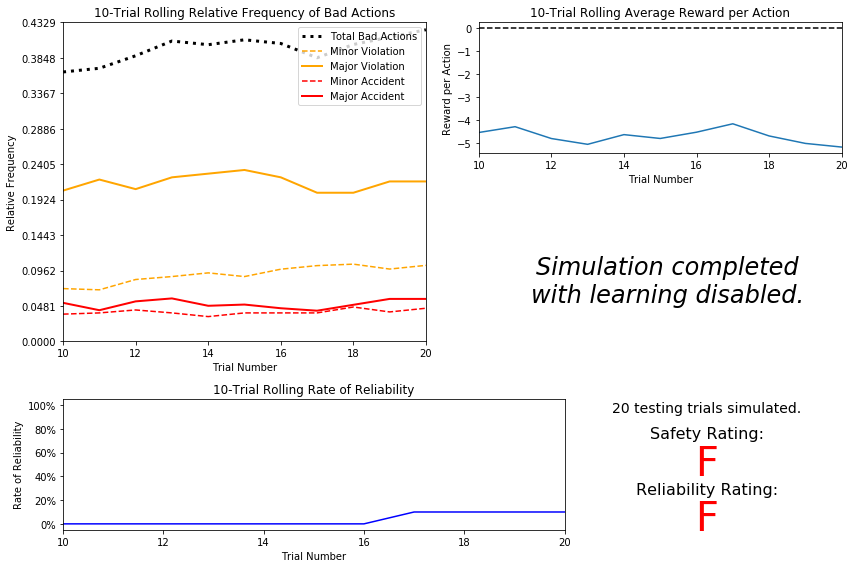

In [12]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### 问题 3
利用上面的从你初始模拟中得到的可视化结果，给出关于驾驶代理程序的分析和若干观察。确保对于可视化结果上的每个面板你至少给出一条观察结果。你可以考虑的一些情况：
- *驾驶代理程序多频繁地做出不良决策？有多少不良决策造成了事故？*
- *假定代理程序是随机驾驶，那么可靠率是否合理？*
- *代理程序对于它的行动会获得什么样的奖励？奖励是否表明了它收到严重的惩罚？*
- *随着试验数增加，结果输出是否有重大变化？*
- *这个智能出租车对于乘客来说，会被人为是安全的且/或可靠的吗？为什么或者为什么不？*

**答案：**

驾驶代理程序做出不良决策在30%以上，其中发生轻微伤事故大概4%，发生重大事故在5%左右；
考虑到代理程序是随机驾驶，那么可靠率这么低也是合理的，从最后那个图像也可以说明该可靠率这么低是合理的； 
代理程序获得了负数的奖励，负数的奖励说明它受到了严重惩罚；
随着试验数增加，结果输出并没有重大变化；
对于乘客来说，它肯定是不安全又不可靠的，因为他的不良决策将在40%左右，不安全，而且代理程序在合理时间内到达目的地的次数很低，不可靠。


-----
## 通知驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第二步，是定义一系列代理程序会在环境中发生的状态。根据输入、感知数据和驾驶代理程序可用的变量，可以为代理程序定义一系列状态，使它最终可以*学习*在一个状态下它需要执行哪个动作。对于每个状态的`'如果这个处于这个状态就那个行动'`的状况称为**策略**，就是最终驾驶代理程序要学习的。没有定义状态，驾驶代理程序就不会明白哪个动作是最优的——或者甚至不会明白它要关注哪个环境变量和条件！

### 识别状态
查看`'build_state()'`代理程序函数，它显示驾驶代理函数可以从环境中获得下列数据：
- `'waypoint'`，*智能出租车*去向目的地应该行驶的方向，它是*智能出租车*车头方向的相对值。
- `'inputs'`，*智能出租车*的感知器数据。它包括  
  - `'light'`，交通灯颜色。
  - `'left'`，*智能出租车*左侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'right'`，*智能出租车*右侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'oncoming'`，*智能出租车*交叉方向车辆的目的方向。如果没有车辆，则返回`None`。
- `'deadline'`，*智能出租车*在时间之内到达目的地还所需的剩余动作数目。

### 问题 4
*代理程序的哪些可用特征与学习**安全性**和**效率**相关性最高？你为什么认为这些特征适合在环境中对**智能出租车**建模？如果你没有选择某些特征，放弃他们的原因是什么？*

**回答：**

在bulid_state()代理程序中inputs与安全性相关，inputs中的lights是交通等颜色决定是否违章，与安全密切相关，left和right分别增加了左侧与右侧的车分别根据交通规则添加行驶条件。当左侧有车且要前进，当前为红灯时，智能出租撤不可以右转，当闯红灯时右侧的车正在前进，应该给以严重惩罚。oncoming，决定了智能出租车交叉方向车辆的目的方向，关系到是否安全。

waypoint：来判断下一步是否是正确的行驶方向，最后到达目的地。以上这些特征都与安全性和效率有关。

而deadline激励智能车在规定时间内完成任务，跟安全性和效率无关，剔除该特征。因为deadline的取值范围大于等于0，如果增加deadline，状态空间则成倍增加，导致需要近乎无限数量的训练，才能得到一个合适策略，另外，在不同网格大小的环境中，要求的deadline的大小不尽相同，使得deadline不具一般性。

### 定义状态空间
当定义一系列代理程序会处于的状态，必需考虑状态空间的*大小*。就是说，如果你期望驾驶代理程序针对每个状态都学习一个**策略**，你会需要对于每一个代理状态都有一个最优的动作。如果所有可能状态的数量非常大，最后会变成这样的状况，驾驶代理程序对于某些状态学不到如何行动，会导致未学习过的决策。例如，考虑用下面的特征定义*智能出租车*的状态的情况：

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.
发生如`(False, True, True, True, False, False, '3AM')`的状态的频次如何？没有近乎无限数量的训练，很怀疑代理程序会学到一个合适的动作！

### 问题 5
*如果用你在**问题4**中选择的特征来定义一个状态，状态空间的大小是多少？假定你了解环境以及它是如何模拟的，你觉得经过合理数量的训练之后，代理驾驶能学到一个较好的策略吗？（遇见绝大部分状态都能作出正确决策。）*
**提示：** 考虑特征*组合*来计算状态的总数！

**回答：**

waypoint行驶过程中有3个、light有2个、oncoming有4个、left有4个、right有4个，这样状态空间的大小是3×2×4×4×4 = 384。经过合理数量的训练之后，代理驾驶能学到一个较好的策略。因为状态空间不大，不需要近乎无限数量的训练就能得到较好的策略。

### 更新驾驶代理程序的状态
要完成你的第二个实现，去到`'build_state()'`代理程序函数。根据你在**问题4**给出的判断，你现在要将`'state'`变量设定为包含所有Q-Learning所需特征的元组。确认你的驾驶代理程序通过运行代理程序文件和模拟会更新它的状态，注意状态是否显示了。如果用了可视化模拟，确认更新的状态和在模拟程序里看到的一致。

**注意：** 观察时记住重置模拟程序的标志到默认设定！

-----
## 实现Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是开始实现Q-Learning自身的功能。Q-Learning的概念相当直接：每个访问的状态，为所有可用的状态-行动配对在Q-table里创建一条记录。然后，当代理程序遇到一个状态并执行了一个动作，基于获得的奖励和设定的相互的更新规则，来更新关联的状态-动作配对的Q-value。当然，Q-Learning还带来其他的收益，如此我们可以让代理程序根据每个可能的状态-动作配对的Q-values，来为每个状态选择*最佳*动作。在这个项目里，你会实现一个*衰减* $\epsilon$ *-贪心* 的Q-learning算法，不含折扣因子。遵从每个代理程序函数的**TODO**下的实现指导。

注意代理程序的属性`self.Q`是一个字典：这就是Q-table的构成。每个状态是`self.Q`字典的键，每个值是另一个字典，包含了*action*和*Q-value*。这里是个样例：

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

此外，注意你要求利用一个*衰减*$\epsilon$*（探索）因子*。因此，随着试验的增加，$\epsilon$会向0减小。这是因为，代理程序会从它的行为中学习，然后根据习得的行为行动。而且当$\epsilon$达到特定阈值后（默认阈值为0.01），代理程序被以它所学到的东西来作检测。作为初始的Q-Learning实现，你将实现一个线性衰减$\epsilon$的函数。

### Q-Learning模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。

此外，使用下面的$\epsilon$衰减函数：

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

In [34]:
%run smartcab/agent.py


/-------------------------
| Training trial 1
\-------------------------

Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000
Simulating trial. . . 
epsilo

Agent previous state: ('left', 'red', None, 'forward', 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.12)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.95)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'forward')
Agent attempted driving left through a red light. (rewarded -10.23)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.15)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\------

Agent previous state: ('left', 'green', None, None, 'left')
Agent drove right instead of left. (rewarded 0.10)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right', None)
Agent attempted driving left through a red light. (rewarded -9.01)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 0.67)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left', None)
Agent followed the waypoint right. (rewarded 1.07)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left', None)
Agent attempted driving left through a red light wit

Agent previous state: ('forward', 'green', None, None, None)
Agent drove right instead of forward. (rewarded 0.03)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left', None)
Agent drove right instead of left. (rewarded -0.20)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'forward')
Agent followed the waypoint right. (rewarded 1.34)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left', None)
Agent drove right instead of left. (rewarded 0.81)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right', 'left')
Agent attempted driving left through a red light. (rewarded -

Agent previous state: ('right', 'red', None, None, 'right')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.92)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 2.00)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 6
\-------------------------

Simulating trial. . . 
epsilon = 0.7000; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7000; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7000; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7000; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7000; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7000; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7000; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.7000; alpha = 0.500

Agent previous state: ('left', 'green', 'forward', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.80)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None, 'right')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.42)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent drove right instead of left. (rewarded 1.43)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'right')
Agent followed the waypoint forward. (rewarded 1.68)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'left')
Agen

Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 2.63)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', None, None, None)
Agent attempted driving forward through a red light. (rewarded -9.69)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left', 'left')
Agent attempted driving forward through a red light. (rewarded -9.21)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent attempted driving forward through a red light. (rewarded -10.33)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, None, 'left')
Agent follo

Agent previous state: ('forward', 'red', None, 'left', 'forward')
Agent attempted driving forward through a red light. (rewarded -10.52)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.95)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'left')
Agent drove right instead of forward. (rewarded 1.63)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward', None)
Agent drove right instead of left. (rewarded 0.92)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (

Agent previous state: ('right', 'green', None, 'left', None)
Agent followed the waypoint right. (rewarded 1.59)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None, 'forward')
Agent followed the waypoint forward. (rewarded 2.06)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.26)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None, 'forward')
Agent properly idled at a red light. (rewarded 2.07)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'forward')
Agent attempted driving left through 

Agent previous state: ('left', 'green', None, None, None)
Agent drove right instead of left. (rewarded -0.32)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left', None)
Agent drove left instead of right. (rewarded -0.23)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None, None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.06)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.64)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left

Agent previous state: ('left', 'red', 'forward', None, None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.33)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 1.20)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None, 'left')
Agent drove forward instead of left. (rewarded 1.38)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.00)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------



Agent previous state: ('right', 'red', None, None, None)
Agent attempted driving forward through a red light. (rewarded -10.08)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.74)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 15
\-------------------------

Simulating trial. . . 
epsilon = 0.2500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2500; alpha = 0.5000
Simulating trial. . . 
epsilon = 0.2500; alpha = 0.5000
Simulati

Agent previous state: ('forward', 'green', None, None, 'left')
Agent drove right instead of forward. (rewarded 0.15)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.51)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.21)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward', 'right')
Agent drove right instead of forward. (rewarded 0.30)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left', None)
Agent attempted driving forward through a red light. (rewarded 

Agent previous state: ('forward', 'red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 2.75)
94% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left', None)
Agent attempted driving left through a red light. (rewarded -10.98)
91% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'right')
Agent drove right instead of forward. (rewarded 0.74)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 2.62)
86% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right', 'forward')
Agent idled at a green light with no 

Agent previous state: ('right', 'green', 'forward', None, 'forward')
Agent drove forward instead of right. (rewarded -0.08)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left', 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.21)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'left', None)
Agent followed the waypoint right. (rewarded 1.74)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent followed the waypoint right. (rewarded 1.43)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'forward', None)
Age

Agent previous state: ('forward', 'red', None, 'forward', 'forward')
Agent drove right instead of forward. (rewarded 1.62)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward', 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.44)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.32)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.03)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', None, None,

| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.75)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right', 'forward')
Agent attempted driving left through a red light. (rewarded -9.28)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove right instead of left. (rewarded 0.37)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward', 'left')
Agent drove forward instead of right. (rewarded 1.03)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', 'right', None, 'forward')

Agent previous state: ('forward', 'red', None, 'right', 'left')
Agent drove right instead of forward. (rewarded 0.97)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 2.14)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.88)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.28)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent drove right instead of forward. (rewarded 1.33)
33% of time r

Agent previous state: ('left', 'green', 'forward', None, 'forward')
Agent drove right instead of left. (rewarded 0.75)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 2.37)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left', None)
Agent followed the waypoint right. (rewarded 1.85)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent drove right instead of forward. (rewarded -0.30)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left', None)
Agent drove right instead of left. (rewarded 0.10)
33% of t

Agent previous state: ('right', 'red', 'forward', 'right', 'left')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.26)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent followed the waypoint right. (rewarded 2.68)
94% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.59)
91% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.99)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent drov

Agent previous state: ('forward', 'green', None, None, 'left')
Agent drove right instead of forward. (rewarded 0.90)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None, None)
Agent drove right instead of left. (rewarded 0.48)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', 'right', 'left', None)
Agent followed the waypoint right. (rewarded 2.06)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None, None)
Agent drove forward instead of right. (rewarded 0.37)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent followed the waypoint right. (rewarded 0.92)
40% of time 

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.79)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'right', None)
Agent drove left instead of forward. (rewarded 1.19)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 2.48)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 8
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simul

epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent

Agent previous state: ('right', 'red', 'forward', None, 'forward')
Agent properly idled at a red light. (rewarded 2.39)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'forward')
Agent followed the waypoint right. (rewarded 1.70)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.38)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.51)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.22)
63% of tim

<Figure size 432x288 with 0 Axes>

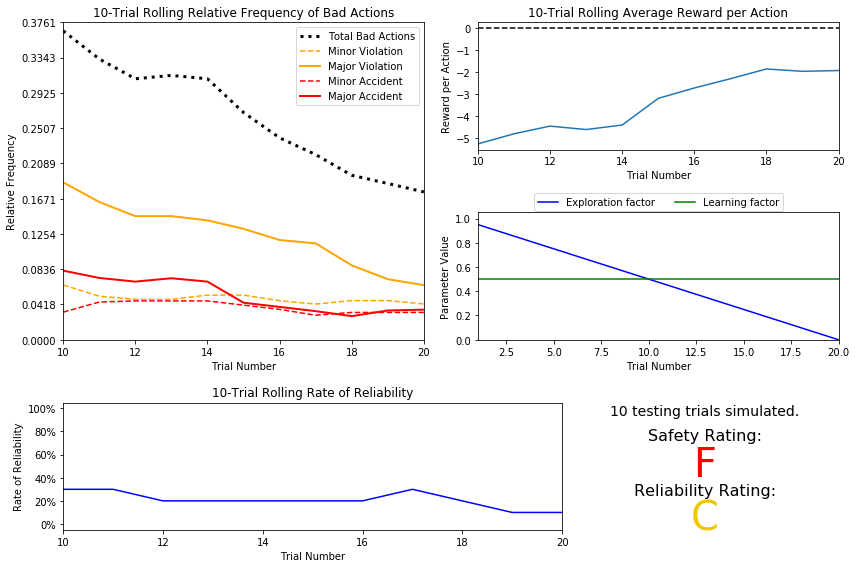

In [35]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### 问题 6
利用上面的从你默认的Q-Learning模拟中得到的可视化结果，像在**问题3**那样，给出关于驾驶代理程序的分析和若干观察。注意模拟程序应该也产生了Q-table存在一个文本文件中，可以帮到你观察代理程序的算法。你可以考虑的一些情况：
- *有没有观察到基本驾驶代理程序和默认的Q-Learning代理程序的相似之处？*
- *在测试之前驾驶代理大约需要做多少训练试验？在给定的$\epsilon$ 容忍度下，这个数字是否合理？*
- *你实现的$\epsilon$（探索因子）衰减函数是否准确地在参数面板中显示？*
- *随着试验数增加，不良动作的数目是否减少?平均奖励是否增加？*
- *与初始的驾驶代理程序相比，安全性和可靠性评分怎样？*

# **回答：**
相比之前的代理程序，Q-Learning的不良率有明显的下降趋势。但是，轻微违章、轻微事故和重大事故没有明显下降，与基本驾驶代理程序相似。


在测试前代理程序经过了近10次训练，在给定的$\epsilon$的容忍度下，这个数字还算合理；

$\epsilon$  衰减函数在参数面板中显示出来了，就是参数值图表里的exploration factor(蓝线)； 

随着实验数增加，不良动作减少了，平均奖励增加了；

至于他的评分，安全性为F，可靠性为C，安全性不变可靠性有所提升。我猜$\epsilon$衰减函数还可以改善，或改变阈值tolerance，而且训练次数还可以增加。

-----
## 改进Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是执行优化！现在Q-Learning算法已经实现并且驾驶代理程序已经成功学习了，需要调整设定、调节参数让驾驶代理程序学习**安全性**和**效率**。通常这一步需要很多试验和错误，因为某些设定必定会造成更糟糕的学习。要记住的一件事是学习的行为本身和需要的时间：理论上，我们可以允许代理程序用非常非常长的时间来学习；然而，Q-Learning另一个目的是*将没有习得行为的试验试验变为有习得行为的行动*。例如，训练中总让代理程序执行随机动作（如果$\epsilon = 1$并且永不衰减）当然可以使它*学习*，但是不会让它*行动*。当改进你的Q-Learning实现时，要考虑做一个特定的调整的意义，以及它是否逻辑上是否合理。

### 改进Q-Learning的模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。
- `'optimized'` - 将此标志设定为`'True'`来告诉驾驶代理你在执行一个优化版本的Q-Learning实现。

优化Q-Learning代理程序可以调整的额外的标志：
- `'n_test'` - 将此标志设定为某个正数（之前是10）来执行那么多次测试试验。
- `'alpha'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的学习率。
- `'epsilon'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的起始探索因子。
- `'tolerance'` - 将此标志设定为某个较小的大于0的值（默认是0.05）来设定测试的epsilon阈值。

此外，使用一个你选择的$\epsilon$ (探索因子)衰减函数。注意无论你用哪个函数，**一定要以合理的速率衰减**到`'tolerance'`。Q-Learning代理程序到此才可以开始测试。某个衰减函数的例子($t$是试验的数目)：

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$

如果你想的话，你也可以使用$\alpha$ （学习率） 的衰减函数，当然这通常比较少见。如果你这么做了，确保它满足不等式$0 \leq \alpha \leq 1$。
如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化，请注意为了达到项目要求你需要在安全性和可靠性上获得至少都为A的评分。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

In [55]:
%run smartcab/agent.py


/-------------------------
| Training trial 1
\-------------------------

Simulating trial. . . 
epsilon = 1.0000; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'green', 'right', 'left', 'left')
Agent followed the waypoint right. (rewarded 2.38)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'forward')
Agent drove right instead of forward. (rewarded 1.39)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left', None)
Agent followed the waypoint left. (rewarded 1.12)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a ma


Agent previous state: ('forward', 'red', None, None, None)
Agent attempted driving forward through a red light. (rewarded -10.99)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 0.95)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'left')
Agent drove right instead of forward. (rewarded 0.69)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward', None)
Agent followed the waypoint left. (rewarded 1.51)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'green', 'right', None, None)
Agent followed the waypoint right. (rew

Agent previous state: ('right', 'green', None, 'left', None)
Agent followed the waypoint right. (rewarded 1.83)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left', 'forward')
Agent drove forward instead of right. (rewarded 0.48)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.07)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent followed the waypoint right. (rewarded 0.83)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None, None)
Agent drove right instead of forward. (reward

Agent previous state: ('right', 'green', 'left', None, None)
Agent drove forward instead of right. (rewarded -0.06)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('right', 'green', None, None, None)
Agent drove left instead of right. (rewarded 1.41)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None, None)
Agent attempted driving forward through a red light. (rewarded -10.59)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left', None)
Agent attempted driving forward through a red light. (rewarded -10.51)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'left')
Agent idled at a green light with

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.65)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent attempted driving forward through a red light. (rewarded -9.42)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, None, None)
Agent drove right instead of left. (rewarded 0.84)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.45)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward', None)
Agent followed the waypoint left. 

Agent previous state: ('forward', 'green', 'left', None, None)
Agent followed the waypoint forward. (rewarded 0.97)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -4.56)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, None, None)
Agent drove left instead of right. (rewarded 0.38)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'right', None)
Agent followed the waypoint right. (rewarded 1.08)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', 'left', None)
Agent idled at a green light with no

Agent previous state: ('left', 'green', 'forward', 'forward', 'left')
Agent followed the waypoint left. (rewarded 1.10)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.65)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, 'right', None)
Agent followed the waypoint left. (rewarded 1.68)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.57)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left', 'right')
Agent drove right instead of forward. (r

Agent previous state: ('forward', 'red', None, None, None)
Agent attempted driving left through a red light. (rewarded -10.58)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.85)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None, None)
Agent drove right instead of left. (rewarded 1.33)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward', None)
Agent followed the waypoint right. (rewarded 1.25)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', None, None, 'left')
Agent drove forward instead of right. (rewarded 1.79)
60

Agent previous state: ('right', 'green', None, None, None)
Agent drove left instead of right. (rewarded -0.31)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'left', None)
Agent followed the waypoint right. (rewarded 0.50)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 16
\-------------------------

Simulating trial. . . 
epsilon = 0.7408; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left', 'right')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.80)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 2.04)
90% o

Agent previous state: ('right', 'red', 'left', 'right', None)
Agent followed the waypoint right. (rewarded 1.04)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.77)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.36)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left', 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.19)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previou

Agent previous state: ('right', 'green', None, None, None)
Agent drove forward instead of right. (rewarded 0.03)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 20
\-------------------------

Simulating trial. . . 
epsilon = 0.6839; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'right', 'forward')
Agent properly idled at a red light. (rewarded 1.40)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'forward')
Agent followed the waypoint right. (rewarded 2.20)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None, 'right')
Agent followed the waypoint forward. (rewarded 2.15)
90% of time remaining to reach de

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.27)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'forward', None)
Agent properly idled at a red light. (rewarded 1.77)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent attempted driving forward through a red light. (rewarded -9.28)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.38)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'forward')
Agent attempted driving forward thr

Agent previous state: ('left', 'red', 'forward', None, None)
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.14)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent drove right instead of left. (rewarded 0.79)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None, None)
Agent drove right instead of left. (rewarded 1.16)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward', 'left')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.98)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'r

Agent previous state: ('left', 'green', None, 'left', None)
Agent drove right instead of left. (rewarded 0.96)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None, None)
Agent followed the waypoint forward. (rewarded 0.91)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.94)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 2.73)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'left')
Agent drove right instead of forward. (rew

Agent previous state: ('left', 'red', None, 'forward', 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.07)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'left')
Agent attempted driving forward through a red light. (rewarded -9.60)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None, 'left')
Agent attempted driving left through a red light. (rewarded -10.56)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'right', 'left')
Agent idled at a green light with oncoming traffic. (rewarded 0.45)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previou

Agent previous state: ('left', 'green', 'forward', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.98)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None, 'left')
Agent drove right instead of left. (rewarded 0.62)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None, 'forward')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.10)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'forward')
Agent attempted driving forward through a red light. (rewarded -10.54)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', '


/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.63)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent attempted driving forward through a red light. (rewarded -10.85)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent drove right instead of forward. (rewarded -0.22)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward', 'left')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.92)
16% of time remaining to rea

Agent previous state: ('forward', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 2.13)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'right', None)
Agent drove right instead of forward. (rewarded 1.48)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left', 'forward')
Agent drove right instead of left. (rewarded 1.20)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'forward', 'left')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -39.26)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'left')

Agent previous state: ('forward', 'red', None, None, None)
Agent attempted driving forward through a red light. (rewarded -9.60)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent drove right instead of forward. (rewarded -0.61)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left', 'left')
Agent drove right instead of left. (rewarded -0.57)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'forward', None)
Agent drove right instead of left. (rewarded 0.80)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None, None)
Agent drove forward instead of right. (rewa

Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.09)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None, None)
Agent followed the waypoint forward. (rewarded 1.35)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.14)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.32)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.68)
65% of time remaining to re

Agent previous state: ('forward', 'red', None, None, 'left')
Agent drove right instead of forward. (rewarded 0.49)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.38)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.60)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.83)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.80)
72% of time remaining 

Agent previous state: ('forward', 'red', 'left', 'left', 'left')
Agent drove right instead of forward. (rewarded 1.57)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right', 'forward')
Agent attempted driving forward through a red light. (rewarded -10.70)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, 'right', 'forward')
Agent properly idled at a red light. (rewarded 1.80)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None, 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.25)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', '

Agent previous state: ('forward', 'red', None, 'right', 'left')
Agent drove right instead of forward. (rewarded 0.35)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'forward')
Agent attempted driving left through a red light. (rewarded -10.76)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 47
\-------------------------

Simulating trial. . . 
epsilon = 0.3985; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.3985; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward', 'forward')
Agent idled at a green light with no oncoming traffic. (rewarded -5.16)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forwa

Agent previous state: ('left', 'red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 1.56)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None, None)
Agent drove right instead of left. (rewarded 0.92)
17% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'forward')
Agent followed the waypoint right. (rewarded 0.55)
13% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None, 'left')
Agent followed the waypoint forward. (rewarded 2.03)
10% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent idled at a green light with no oncoming traffic. (rewa

Agent previous state: ('left', 'green', None, 'forward', 'forward')
Agent drove right instead of left. (rewarded 0.47)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', 'right', None, 'left')
Agent drove forward instead of right. (rewarded 1.24)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.01)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None, 'left')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.72)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', None, None,

Agent previous state: ('left', 'red', 'forward', None, None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.41)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent drove right instead of left. (rewarded 0.74)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left', None)
Agent followed the waypoint forward. (rewarded 1.96)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'forward', None)
Agent properly idled at a red light. (rewarded 2.18)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'f

Agent previous state: ('left', 'green', 'forward', 'left', 'left')
Agent drove forward instead of left. (rewarded 0.17)
57% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove forward instead of left. (rewarded 0.79)
54% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward', None)
Agent drove right instead of left. (rewarded 1.73)
51% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 1.89)
49% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None, None)
Agent followed the waypoint right. (rewarded 2.10)

Agent previous state: ('left', 'red', None, None, 'right')
Agent drove right instead of left. (rewarded -0.30)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 56
\-------------------------

Simulating trial. . . 
epsilon = 0.3329; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.3329; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.3329; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.3329; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left', 'forward')
Agent followed the waypoint forward. (rewarded 1.42)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward', 'left')
Agent drove right instead of forward. (rewarded 0.03)
90% of time remaining to reach destination.

/-------------------
| Step 2 Resu

Agent previous state: ('right', 'green', None, None, 'left')
Agent followed the waypoint right. (rewarded 2.49)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 0.98)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.06)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.07)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.75)
56% of tim

Agent previous state: ('forward', 'red', None, None, None)
Agent attempted driving left through a red light. (rewarded -9.76)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.07)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'forward')
Agent followed the waypoint right. (rewarded 1.45)
16% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 62
\-------------------------

Simulating trial. . . 
epsilon = 0.2952; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 2.74)
95% of time remaining to reach dest

Agent previous state: ('forward', 'green', None, 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.05)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'left', 'right')
Agent drove right instead of forward. (rewarded -0.05)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent drove right instead of left. (rewarded 0.26)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left', None)
Agent properly idled at a red light. (rewarded 1.08)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, 'left', 'left')
Agent drove right instead of left. (r

Agent previous state: ('left', 'red', None, 'left', 'forward')
Agent drove right instead of left. (rewarded 0.00)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', None, None, 'forward')
Agent followed the waypoint right. (rewarded 0.62)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 0.60)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'left', None)
Agent followed the waypoint forward. (rewarded 2.38)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward', None)
Agent idled at a green light with no oncoming traf

Agent previous state: ('forward', 'green', None, 'left', 'left')
Agent drove right instead of forward. (rewarded 0.08)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None, 'forward')
Agent drove right instead of left. (rewarded 0.47)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent followed the waypoint right. (rewarded 2.09)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left', None)
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.06)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'le

Agent previous state: ('right', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.43)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent followed the waypoint right. (rewarded 2.69)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'forward', None)
Agent properly idled at a red light. (rewarded 2.28)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 2.23)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None, 'forward')
Agent attempted driving forward through a red light. (rewar

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.30)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None, None)
Agent followed the waypoint forward. (rewarded 2.38)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.06)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent drove left instead of forward. (rewarded 1.07)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 2.28)
28% of time re

Agent previous state: ('left', 'green', 'left', 'left', None)
Agent followed the waypoint left. (rewarded 2.22)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent attempted driving forward through a red light. (rewarded -9.01)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.20)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward', None)
Agent followed the waypoint left. (rewarded 1.21)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'forward', None)
Agent attempted driving forward through a red ligh

Agent previous state: ('right', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.64)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 2.13)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 1.22)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.50)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.21)
35% of time remaining

Agent previous state: ('left', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.06)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None, 'forward')
Agent drove right instead of left. (rewarded -0.58)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left', 'left')
Agent drove right instead of left. (rewarded 1.08)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward', 'forward')
Agent followed the waypoint right. (rewarded 0.59)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 80
\-------------------------

Simulating trial. . . 
epsilon = 0.2060; alpha = 0.

Agent previous state: ('right', 'green', None, 'left', None)
Agent followed the waypoint right. (rewarded 1.17)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 1.14)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.11)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 1.52)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None, None)
Agent followed the waypoint forward. (rewarded 1.41)
45% of time re

Agent previous state: ('right', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.43)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward', None)
Agent drove left instead of right. (rewarded 0.55)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None, None)
Agent drove left instead of right. (rewarded 0.08)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward', 'left')
Agent idled at a green light with oncoming traffic. (rewarded 0.95)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward', 'forward')
Agent drove right instead of left. (rewa

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.79)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.05)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.94)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None, None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.95)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None, None)
Agent drove right instead of left. (rewarded 1.20)
76% of tim

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.84)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'right')
Agent drove right instead of left. (rewarded 0.16)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left', 'forward')
Agent followed the waypoint right. (rewarded 2.18)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', None, None, 'left')
Agent followed the waypoint right. (rewarded 0.72)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'forward')
Agent drove right instead of forward. (rewarded 0.97)
35% of ti

Agent previous state: ('left', 'green', 'left', None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.10)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None, 'left')
Agent followed the waypoint left. (rewarded 2.13)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.80)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'left', None)
Agent followed the waypoint left. (rewarded 2.20)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Age

Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.80)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None, None)
Agent attempted driving left through a red light. (rewarded -9.86)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.94)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 2.51)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.40)

Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.00)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.46)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 2.03)
52% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 99
\-------------------------

Simulating trial. . . 
epsilon = 0.1409; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.1409; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.1409; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'forward

Agent previous state: ('right', 'green', None, None, 'forward')
Agent followed the waypoint right. (rewarded 2.00)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None, None)
Agent drove left instead of right. (rewarded 0.78)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.44)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None, 'forward')
Agent drove right instead of forward. (rewarded 1.75)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 2.5

Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.33)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.70)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.60)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.64)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.94)
77% of tim

Agent previous state: ('right', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.95)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.38)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', None, None, 'left')
Agent followed the waypoint right. (rewarded 1.19)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left', 'left')
Agent drove forward instead of right. (rewarded 0.97)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'forward')
Agent followed the waypoint right. (rewarded 1.07)
20% of time 

Agent previous state: ('forward', 'red', None, 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.92)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.80)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.16)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.87)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 

Agent previous state: ('forward', 'green', None, 'right', None)
Agent drove right instead of forward. (rewarded -0.24)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.89)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None, 'left')
Agent properly idled at a red light. (rewarded 0.84)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.07)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'green', None, None, 'left')
Agent followed the waypoint right. (rewarded 0.57)
0%

Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.44)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.85)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', 'left', 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.47)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 2.37)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', N

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.48)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 119
\-------------------------

Simulating trial. . . 
epsilon = 0.0944; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0944; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0944; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0944; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None, 'forward')
Agent attempted driving left through a red light. (rewarded -10.70)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'forward', 'forward')
Agent followed the waypoint right. (rewarded 2.28)
93% of time remaining to reach destination.

/-------------------
| Step 2 Re

Agent previous state: ('right', 'green', 'forward', 'left', 'left')
Agent idled at a green light with oncoming traffic. (rewarded -0.33)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left', 'left')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.39)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.01)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.13)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, 'fo

Agent previous state: ('right', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.61)
23% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('right', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.85)
20% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None, None)
Agent followed the waypoint right. (rewarded 2.29)
17% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.29)
14% of time remaining to reach destination.

/-------------------
| Step 30 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left', None)
Agent drove right instead of left. (rewarded 0.43)
11% of time remaining to rea

Agent previous state: ('right', 'green', None, None, 'right')
Agent followed the waypoint right. (rewarded 1.49)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None, None)
Agent drove right instead of left. (rewarded 1.45)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'red', 'right', None, 'left')
Agent followed the waypoint right. (rewarded 2.49)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.18)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.94)
24% of time rem

Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.67)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.40)
45% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 129
\-------------------------

Simulating trial. . . 
epsilon = 0.0773; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0773; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, 'right', 'forward')
Agent properly idled at a red light. (rewarded 2.86)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'forward')
Agent followed the waypoint right. (rewarded

Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 2.80)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None, None)
Agent followed the waypoint forward. (rewarded 1.48)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'forward', None)
Agent properly idled at a red light. (rewarded 2.67)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None, 'right')
Agent properly idled at a red light. (rewarded 1.78)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward', 'forward')
Agent properly idled at a red light. (r

Agent previous state: ('left', 'green', 'left', 'forward', 'right')
Agent drove right instead of left. (rewarded 0.90)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'green', None, None, 'forward')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.80)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 2.34)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'left', None)
Agent followed the waypoint right. (rewarded 1.08)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'forward')
Agent followed the w

Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.28)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'forward', 'forward')
Agent drove right instead of forward. (rewarded 0.18)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'right')
Agent drove right instead of left. (rewarded -0.02)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.10)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarde

Agent previous state: ('right', 'green', 'left', 'left', None)
Agent followed the waypoint right. (rewarded 1.21)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward', 'right')
Agent drove right instead of left. (rewarded 1.17)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'left', None)
Agent drove left instead of forward. (rewarded 1.47)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward', None)
Agent followed the waypoint right. (rewarded 2.01)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 2.13)
70% of tim

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.54)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.51)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent attempted driving forward through a red light. (rewarded -9.57)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None, None)
Agent followed the waypoint forward. (rewarded 1.61)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.23)
8% of

Agent previous state: ('left', 'green', None, 'forward', None)
Agent followed the waypoint left. (rewarded 1.90)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None, None)
Agent followed the waypoint forward. (rewarded 0.76)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 0.60)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 0.83)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward', 'right')
Agent drove right instead of left. (rewarded

Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.70)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'forward')
Agent followed the waypoint forward. (rewarded 1.98)
68% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 148
\-------------------------

Simulating trial. . . 
epsilon = 0.0529; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0529; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 1.84)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None, 'left')
Agent properly idled at a red lig

Agent previous state: ('left', 'green', None, 'left', None)
Agent followed the waypoint left. (rewarded 2.03)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 151
\-------------------------

Simulating trial. . . 
epsilon = 0.0498; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0498; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.52)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left', 'right')
Agent drove right instead of forward. (rewarded 0.10)
93% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', 'right', 'left', None)
Agent drove right instead of left. (reward

Agent previous state: ('right', 'red', None, None, None)
Agent attempted driving forward through a red light. (rewarded -9.19)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.81)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', 'right', 'forward')
Agent drove right instead of forward. (rewarded 0.37)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.32)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove forward instead of left. (rewarded 0.9

Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.35)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.46)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.87)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.20)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.31)
64% of time 

\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent attempted driving forward through a red light. (rewarded -9.63)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.47)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.35)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 1.89)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent drove right instead of 

Agent previous state: ('left', 'red', 'forward', None, 'left')
Agent properly idled at a red light. (rewarded 2.05)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', 'left', 'left', 'left')
Agent drove right instead of left. (rewarded 1.15)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', None, 'forward')
Agent drove right instead of forward. (rewarded 0.20)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', 'left', 'forward', 'left')
Agent followed the waypoint left. (rewarded 2.55)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward', None)
Agent drove right instead of forward. (rewarde

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.43)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.47)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 0.83)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None, None)
Agent followed the waypoint right. (rewarded 2.07)
23% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 164
\-------------------------

Simulating trial. . . 
epsilon = 0.0384; alpha = 0.2000
Simulating trial.

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.27)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left', None)
Agent drove right instead of left. (rewarded 1.76)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.36)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 2.13)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 2.81)
60% of ti

Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.95)
37% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 169
\-------------------------

Simulating trial. . . 
epsilon = 0.0347; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.27)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'forward', None)
Agent drove left instead of forward. (rewarded 1.15)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('right', 'green', 'left', None, 'left')
Agent followed the waypoint right. (rewarded 1.87)
85% of

Agent previous state: ('right', 'green', 'right', 'right', 'forward')
Agent drove forward instead of right. (rewarded 0.86)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'green', 'left', 'left', None)
Agent followed the waypoint right. (rewarded 1.80)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None, None)
Agent drove right instead of forward. (rewarded 0.61)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None, 'right')
Agent drove right instead of left. (rewarded 0.04)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('right', 'red', None, 'forward', 'left')
Agent properly idled at a red light. (rewarde

Agent previous state: ('left', 'red', 'forward', None, 'forward')
Agent properly idled at a red light. (rewarded 2.00)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'forward')
Agent drove forward instead of left. (rewarded -0.02)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', 'left', None, 'forward')
Agent drove forward instead of left. (rewarded 1.41)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.55)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', None, 'forward', 'left')
Agent idled at a green light with oncoming traffic

Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 2.15)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 2.15)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent drove right instead of forward. (rewarded -0.27)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', None, 'left', None)
Agent drove right instead of left. (rewarded -0.64)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'green', None, 'left', None)
Agent followed the waypoint right. (rewarded 0.88)
5% of time remaining to 

Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 2.10)
60% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 182
\-------------------------

Simulating trial. . . 
epsilon = 0.0268; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0268; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0268; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0268; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0268; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0268; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0268; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0268; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 1.63)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\--------

Agent previous state: ('forward', 'green', None, None, 'right')
Agent followed the waypoint forward. (rewarded 2.48)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'right', None)
Agent followed the waypoint forward. (rewarded 1.00)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'left', 'left')
Agent drove right instead of forward. (rewarded -0.05)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.56)
50% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 185
\-------------------------

Simulating trial. . . 
epsilon = 0.0252; alpha = 0.2000

Agent previous state: ('right', 'green', 'left', 'left', 'right')
Agent drove forward instead of right. (rewarded -0.27)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('right', 'green', 'forward', None, None)
Agent drove left instead of right. (rewarded 0.13)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 0.96)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'red', 'right', None, None)
Agent properly idled at a red light. (rewarded 2.06)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None, None)
Agent drove right instead of left. (rewarded 0.62)
15% of tim

Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.69)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('forward', 'red', 'right', None, 'left')
Agent properly idled at a red light. (rewarded 1.20)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.21)
27% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 190
\-------------------------

Simulating trial. . . 
epsilon = 0.0228; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0228; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0228; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0228; alpha = 0.2000

/-------------------
| Step 0 Results
\-------

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.52)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'right')
Agent drove right instead of left. (rewarded 1.38)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', None, None)
Agent followed the waypoint forward. (rewarded 1.29)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.60)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None, 'forward')
Agent drove right instead of forward. (rewarded 0.88)
35% o

Agent previous state: ('forward', 'green', 'forward', 'forward', 'forward')
Agent drove right instead of forward. (rewarded 0.93)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.70)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None, 'forward')
Agent drove right instead of left. (rewarded 1.03)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'green', None, 'forward', None)
Agent drove left instead of right. (rewarded 0.73)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('left', 'green', 'right', 'left', None)
Agent drove forward instead of left. (rew

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.24)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 1.45)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None, None)
Agent drove right instead of left. (rewarded 0.17)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'red', 'left', None, 'left')
Agent properly idled at a red light. (rewarded 2.15)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.85)
35% of time remaini

Agent previous state: ('forward', 'red', None, 'forward', None)
Agent drove right instead of forward. (rewarded 0.47)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None, None)
Agent followed the waypoint left. (rewarded 1.47)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('right', 'green', None, None, None)
Agent followed the waypoint right. (rewarded 2.34)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'forward', None)
Agent drove left instead of forward. (rewarded 0.37)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', 'left', 'forward', 'forward')
Agent followed the waypoint right. (reward

Agent previous state: ('left', 'red', None, 'left', 'right')
Agent drove right instead of left. (rewarded 0.98)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('right', 'red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.17)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.12)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 203
\-------------------------

Simulating trial. . . 
epsilon = 0.0176; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0176; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0176; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0176; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------


epsilon = 0.0169; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', 'left', 'forward')
Agent drove forward instead of left. (rewarded 0.40)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'forward')
Agent drove right instead of left. (rewarded 1.49)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None, 'forward')
Agent drove right instead of left. (rewarded 0.33)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.22)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state

Agent previous state: ('forward', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 1.59)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward', None)
Agent drove right instead of forward. (rewarded 0.56)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None, 'left')
Agent drove right instead of left. (rewarded 1.54)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('right', 'green', None, None, 'left')
Agent followed the waypoint right. (rewarded 1.97)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.82)
48% of time

Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.31)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None, 'left')
Agent followed the waypoint left. (rewarded 1.82)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 1.02)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.28)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', None, None)
Agent followed the waypoint forward. (rewarded 1.59)
50% of time

Agent previous state: ('forward', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 1.75)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'right')
Agent followed the waypoint forward. (rewarded 2.41)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 2.32)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'green', None, None, 'left')
Agent followed the waypoint right. (rewarded 2.73)
70% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 214
\-------------------------

Simulating trial. . . 
epsilon = 0.0141; alpha = 0.2000
Simu

Simulating trial. . . 
epsilon = 0.0136; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0136; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0136; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0136; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0136; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0136; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0136; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None, 'forward')
Agent properly idled at a red light. (rewarded 2.56)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('left', 'red', 'left', None, 'forward')
Agent properly idled at a red light. (rewarded 1.90)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 

Agent previous state: ('left', 'red', None, None, 'forward')
Agent properly idled at a red light. (rewarded 2.31)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None, 'forward')
Agent properly idled at a red light. (rewarded 1.92)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('left', 'green', 'forward', None, 'forward')
Agent drove right instead of left. (rewarded 0.76)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('right', 'red', None, None, None)
Agent followed the waypoint right. (rewarded 1.59)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left', 'left')
Agent drove right instead of forward. (rewarded 1.01)
6

Agent previous state: ('left', 'green', 'right', 'left', 'left')
Agent followed the waypoint left. (rewarded 1.66)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, None)
Agent followed the waypoint forward. (rewarded 0.73)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('forward', 'red', None, 'forward', None)
Agent drove right instead of forward. (rewarded 0.46)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.93)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 0.84)
20% of time 

Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.25)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.00)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('left', 'red', None, 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.78)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('left', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 1.06)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 0.98)
0% of time remai

Agent previous state: ('left', 'green', None, 'forward', None)
Agent followed the waypoint left. (rewarded 1.78)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.78)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'right')
Agent properly idled at a red light. (rewarded 2.80)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.54)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 1.14)
70% of t

Agent previous state: ('forward', 'red', None, 'forward', 'right')
Agent properly idled at a red light. (rewarded 1.36)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, 'left')
Agent properly idled at a red light. (rewarded 0.27)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 0.22)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 232
\-------------------------

Simulating trial. . . 
epsilon = 0.0099; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0099; alpha = 0.2000
Simulating trial. . . 
epsilon = 0.0099; alpha = 0.2000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('left', 'red',

Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.14)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('forward', 'green', None, None, 'left')
Agent followed the waypoint forward. (rewarded 1.16)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'red', 'forward', None, None)
Agent properly idled at a red light. (rewarded 2.39)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.48)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 2.16)
50% of time remaining t

Agent previous state: ('left', 'green', None, None, 'left')
Agent followed the waypoint left. (rewarded 1.43)
80% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Testing trial 6
\-------------------------

Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000
Simulating trial. . . 
epsilon = 0.0000; alpha = 0.0000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('right', 'red', None, None, 'forward')
Agent followed the waypoint right. (rewarded 1.88)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('forward', 'green', 'right', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.84)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('forward', 'green', 'forward', 'forward', None)
Agent followed the waypoint forwar

Agent previous state: ('left', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 2.00)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('left', 'green', None, None, None)
Agent followed the waypoint left. (rewarded 1.52)
77% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('forward', 'red', None, None, None)
Agent properly idled at a red light. (rewarded 1.88)
74% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('forward', 'red', 'left', None, None)
Agent properly idled at a red light. (rewarded 2.72)
71% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('forward', 'green', None, 'left', None)
Agent followed the waypoint forward. (rewarded 1.84)
69% of time remainin

<Figure size 432x288 with 0 Axes>

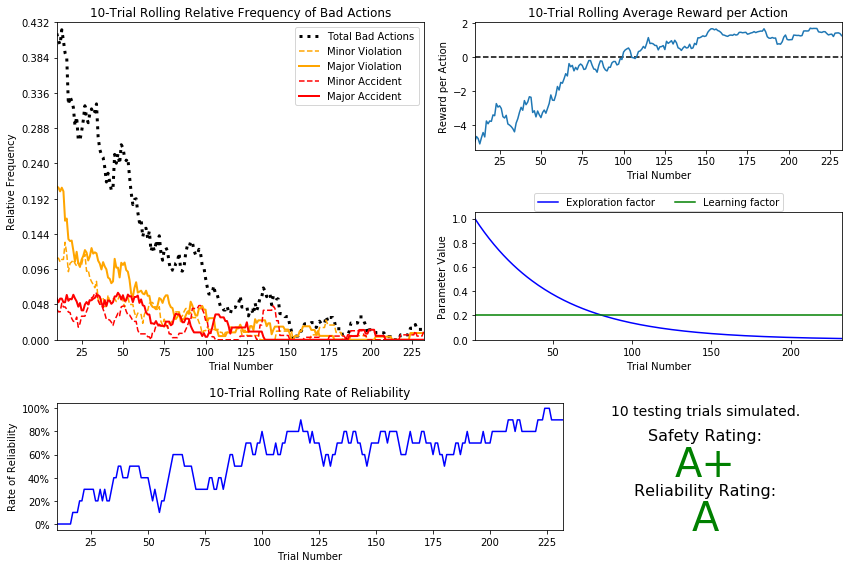

In [56]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### 问题7
利用上面的从你改进的Q-Learning模拟中得到的可视化结果，像在**问题6**那样，给出关于改进的驾驶代理程序的最终分析和观察。你需要回答的问题：
- *使用了什么epsilon（探索因子）的衰减函数？*
- *在测试之前驾驶代理大约需要做多少训练试验？*
- *你用了什么epsilon-tolerance和alpha（学习率）值？为什么？*
- *与之前的默认Q-Learning学习器相比，这个Q-Learning学习器有多少改进？ *
- *你会说Q-Learning学习器的结果表明了你的驾驶代理程序成功地学习了一个合适的策略吗？*
- *你对*智能出租车*的安全性和可靠性评分满意吗？*

### **回答：**

1、对于$\epsilon = a^t, \textrm{for } 0 < a < 1  和  \epsilon = \frac{1}{t^2}探索因子$，衰减函数先迅速下降后缓慢下降，衰减函数短时间内下降太快，导致在未更新完所有行动的Q初始化值时就已经转入根据最大Q值选用行动的策略，此时部分行动的Q值还是0，影响后续训练选择最大Q值对应的行动的准确性。而$\epsilon = \cos(at), \textrm{for } 0 < a < 1$探索因子，衰减函数先缓慢下降后迅速下降，衰减函数短时间内下降太慢，Q初始化值得到了充分的更新，但是在转入根据最大Q值选用行动的策略时，衰减函数短时间内下降太快，导致在该策略下训练不足，效果不理想。因此，我使用了探索因子$\epsilon = e^{-at}, \textrm{for } 0 < a < 1 $。该探索因子的衰减函数先下降后缓慢下降，前段的下降不是特别快，使Q初始化值得到充分更新，后段下降缓慢，使根据最大Q值选用行动的策略得到充分的训练，训练效果好。

2、在测试之前驾驶代理大约需要做232训练试验

3、用的self.epsilon = math.exp(-0.02*self.trial_num)，tolerance为值0.01，alpha值为0.2。tolerance是衰减函数的阈值，用于判断什么时候开始测试，当衰减函数值小于tolerance时开始进行测试。alpha（学习率）用于调整行动后的Q值受行动前的Q值和奖励的影响程度，也就是调整已有经验和新的探索对智能车行动的影响，如果学习率越大，则保留之前训练的效果就越少。由上图可知，epsilon先衰减后平缓。因为一开始使用随机动作，后来通过学习，选取奖励最大的动作，提高学习效率。

4、对epsilon、tolerance进行调整。安全性和可靠性均明显提升。

5、安全性由F变成A+，可靠性由C变为A，训练次数232次，训练过程也较稳定，结果表明代理程序学到了一个合适的策略

6、对结果比较满意，因为是安全性为A+，符合安全要求


### 定义一个最优策略

有时，对于重要的问题*“我要让我的代理程序学习什么？”*的答案，只是理论性的，无法具体描述。然而这里，你可以具体定义代理程序要学什么，就是美国通行权交通法案。这些法律是已知信息，你可以基于这些法律，为*智能出租车*进一步定义每一个状态所做的最优动作。在那种情况下，我们称这一系列最优状态-动作配对为**最优策略**。因此，不像那些理论性的回答，不仅通过收到的奖励（惩罚），而且纯观察，代理程序是否在“错误”地行动能很清晰地得知。如果代理程序闯了红灯，我们既看见它获得了一个负面奖励，也知道这是一个错误的行为。这可以用来帮你验证驾驶代理程序习得的**策略**是否正确，或只是个**次优策略**。

### 问题 8
给出几个关于最优策略是什么样子的例子（用你已定义的状态）。之后，查看`'sim_improved-learning.txt'`文本文件，看你的改进的Q-Learning算法的结果。_每个从模拟中纪录的状态，对于给定的状态，**策略**（得分最高的动作）是否正确？是否对于有些状态，有策略不同于预期的最优策略？_给出一个状态和记录的状态-动作的奖励，解释为什么正是个正确的策略。

**回答：** 

最优策略，宏观上就是在训练智能车时，在保证安全性的情况下用最少的步骤到达目的地。在安全性的前提下选用可靠性最高的策略。

在模拟器中如：

('left', 'red', 'forward', 'left', None)
 - forward : 0.00
 - left : 0.00
 - right : -4.00
 - None : 1.86

在这个例子中，目标方向是左方，红灯，左方来车直行，右方来车左转，前方没来车。我们的最优策略当然是不移动，所以None的奖励最大。

如果此时左转，虽然能更快到达目的地提高可靠性，但是安全性没法保证，会导致违章或事故的后果，最后会得到惩罚的奖励。因此，在可靠性和安全性上，优先选择保证安全性，在安全的前提下可以适当降低可靠性。所以此时不移动是最优策略。


另外：

('right', 'green', None, 'left', 'left')
 - forward : 0.19
 - left : 0.27
 - right : 0.00
 - None : 0.04
 
在这个例子中，目标方向是右方，绿灯，左方没有来车，右方来车左转，前方来车左转。left的奖励最大，所以我们的策略是左转。

然而，此时左转和右转都能保证安全性，而本方车俩原本是要右转的，此时右转会同时提高可靠性，因此右转才是最优策略。而程序给出的只是次优策略，当然也是个正确的策略。


-----
### 选做：未来奖励 - 折扣因子 `'gamma'`
也许你会好奇，作为Q-Learning算法的一部分，之前要求你在实现中**不要**使用折扣引子`'gamma'`。在算法中包含未来奖励能有助于在未来状态回溯到当前状态时的反向正面奖励。本质上，如果给予驾驶代理程序执行若干动作到达不同状态的选择，包含未来奖励会是代理程序偏向可以得到更多奖励的状态。一个例子是驶向目的的驾驶代理程序：所有行动和奖励都相等，那么理论上如果到达目的地会有额外奖励，驶向目的会获得更好的奖励。然而，即使在这个项目里，驾驶代理程序也要在规定的时间里到达目的地，包含未来奖励不会有益于代理程序。实际上，如果代理程序给予多次试验学习，它甚至会给Q-value带来负面影响！

### 可选问题 9
*在项目中有两个特点使得未来奖励在这个Q-Learning算法无效。一个特点是关于*智能出租车*本身，另一个是关于环境。你能指出它们是什么以及为什么未来奖励不会在这个项目中起效？*

**回答：**

> **注意**:当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。